# Superstore Marketing Campaign Dataset

### About Dataset

**Context-** 
A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

**Objective -** 
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

For more - https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('Data/superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Convert the 'date_column' to datetime dtype
copied = df.copy()

copied[copied['Income'].isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2/3/2014,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,1/4/2013,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,5/27/2014,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,12/1/2014,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,5/18/2013,52,375,...,94,66,96,7,4,10,4,3,0,0


In [5]:
# Calculate the mean of the 'income' column, ignoring NaN values
income_mean = copied['Income'].mean()

# Replace NaN values in the 'income' column with the mean
copied['Income'].fillna(income_mean, inplace=True)

In [6]:
copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
copied['Dt_Customer'] = pd.to_datetime(copied['Dt_Customer'])

copied['year'] = copied['Dt_Customer'].dt.year
copied['month'] = copied['Dt_Customer'].dt.month
copied['day'] = copied['Dt_Customer'].dt.day

copied.drop(['Id','Dt_Customer'], axis = 1, inplace = True)
copied.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,1,4,4,6,1,1,0,2014,6,16
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,...,1,7,3,7,5,1,0,2014,6,15
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,...,1,3,2,5,2,0,0,2014,5,13
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,...,1,1,0,2,7,0,0,2014,11,5
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,...,2,3,1,2,7,1,0,2014,8,4


In [8]:
copied.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [9]:
copied['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

In [10]:
numeric_columns = copied.select_dtypes(include=['number']).columns
numeric_columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'year', 'month', 'day'],
      dtype='object')

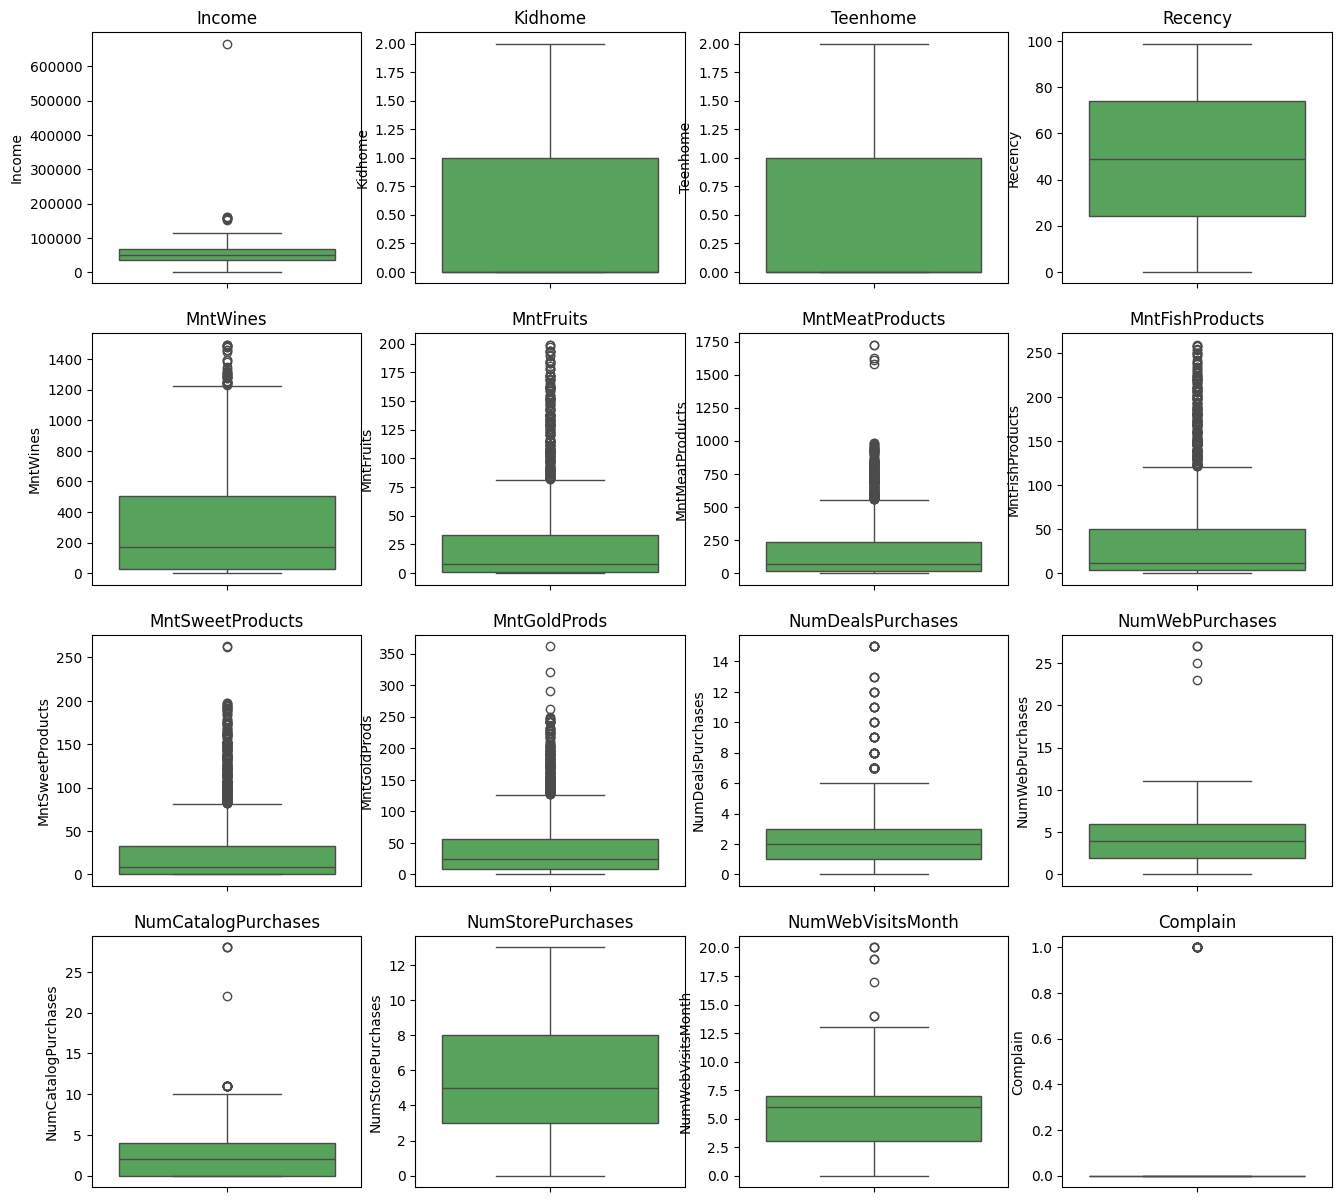

In [11]:
list_boxplots = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']
 
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(16, 15))
 
cont = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(copied[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

#Save the image below
plt.savefig("BoxPlot(Before removing outliers).png",dpi = 300,bbox_inches ="tight")

In [12]:
column_name = ['Income', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
 
# Function to calculate IQR and cap outliers
def cap_outliers(copied, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = copied[column_name].quantile(0.25)
    Q3 = copied[column_name].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Determine the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    copied[column_name] = np.where(copied[column_name] < lower_bound, lower_bound, copied[column_name])
    copied[column_name] = np.where(copied[column_name] > upper_bound, upper_bound, copied[column_name])
    return df, lower_bound, upper_bound
 
# Cap outliers in the 'values' column
capped_copied, lower_bound, upper_bound = cap_outliers(copied, column_name)
 
#print("Original DataFrame:")
#print(pd.DataFrame(df))  # Print original data for comparison
#print("\nCapped DataFrame:")
print(capped_copied)
print(f"\nLower bound for capping: {lower_bound}")
print(f"Upper bound for capping: {upper_bound}")

         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0   6/16/2014        0       189  ...              

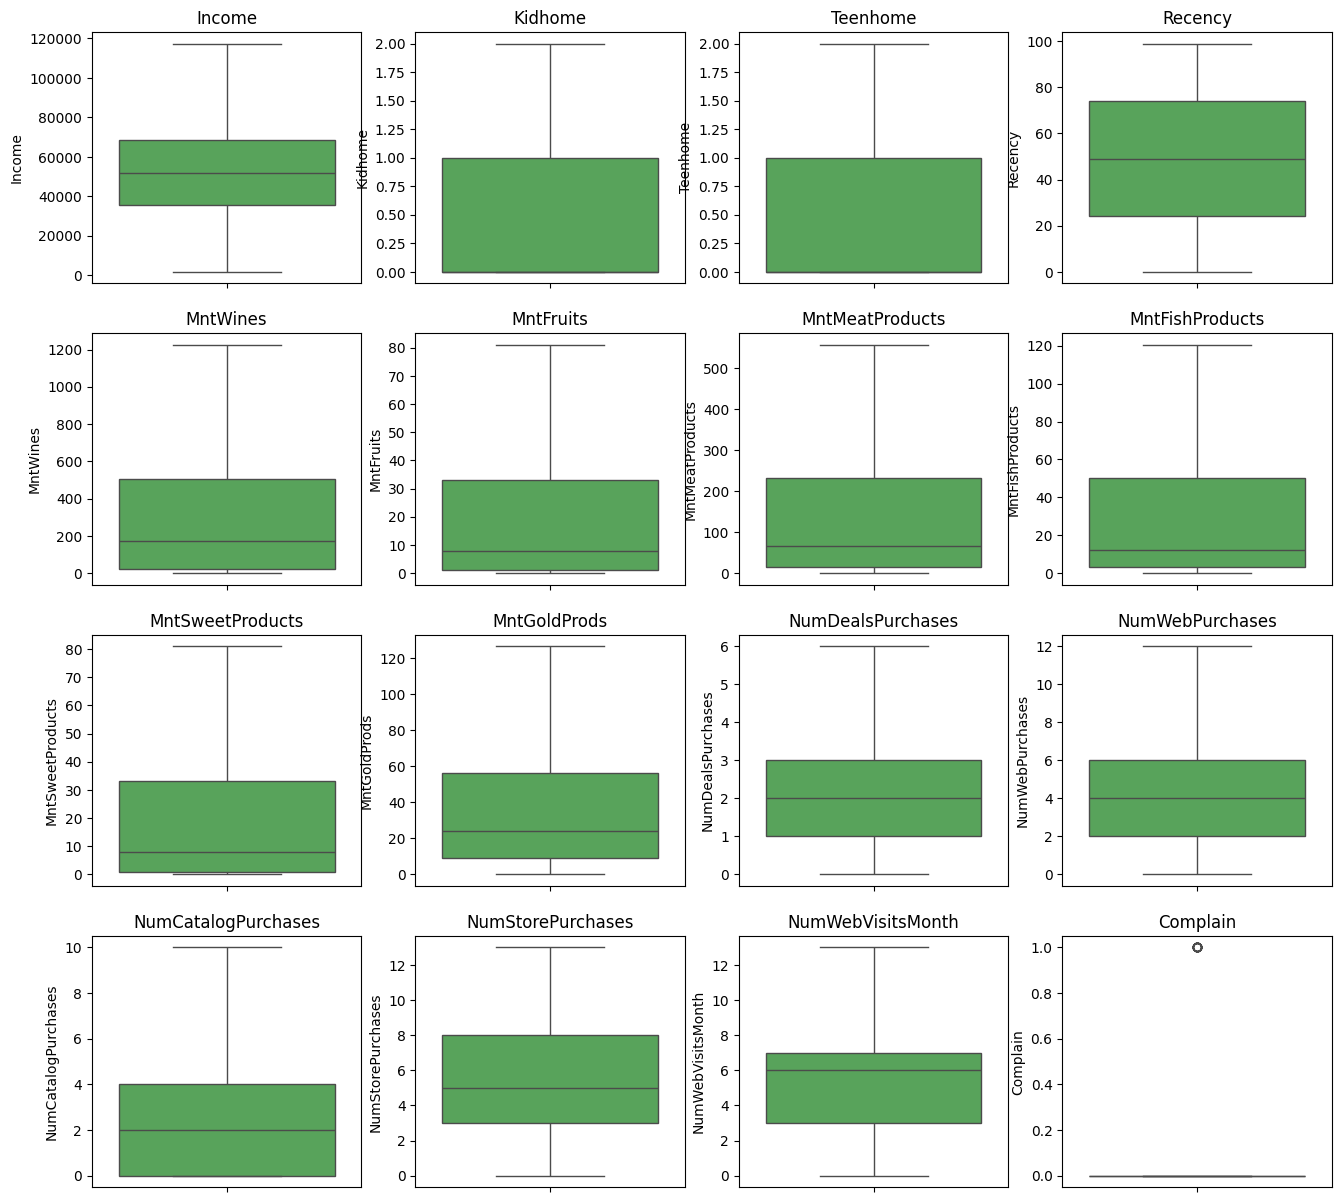

In [13]:
list_boxplots = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']
 
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(16, 15))
 
cont = 0
for i in range(4):
    for j in range(4):
        sns.boxplot(copied[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1


#Save the image below
plt.savefig("BoxPlot(After removing outliers).png",dpi = 300,bbox_inches ="tight")

In [14]:
copied.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,year,month,day
0,1970,Graduation,Divorced,84835.0,0,0,0,189.0,81.0,379.0,...,1.0,4.0,4.0,6.0,1.0,1,0,2014,6,16
1,1961,Graduation,Single,57091.0,0,0,0,464.0,5.0,64.0,...,1.0,7.0,3.0,7.0,5.0,1,0,2014,6,15
2,1958,Graduation,Married,67267.0,0,1,0,134.0,11.0,59.0,...,1.0,3.0,2.0,5.0,2.0,0,0,2014,5,13
3,1967,Graduation,Together,32474.0,1,1,0,10.0,0.0,1.0,...,1.0,1.0,0.0,2.0,7.0,0,0,2014,11,5
4,1989,Graduation,Single,21474.0,1,0,0,6.0,16.0,24.0,...,2.0,3.0,1.0,2.0,7.0,1,0,2014,8,4


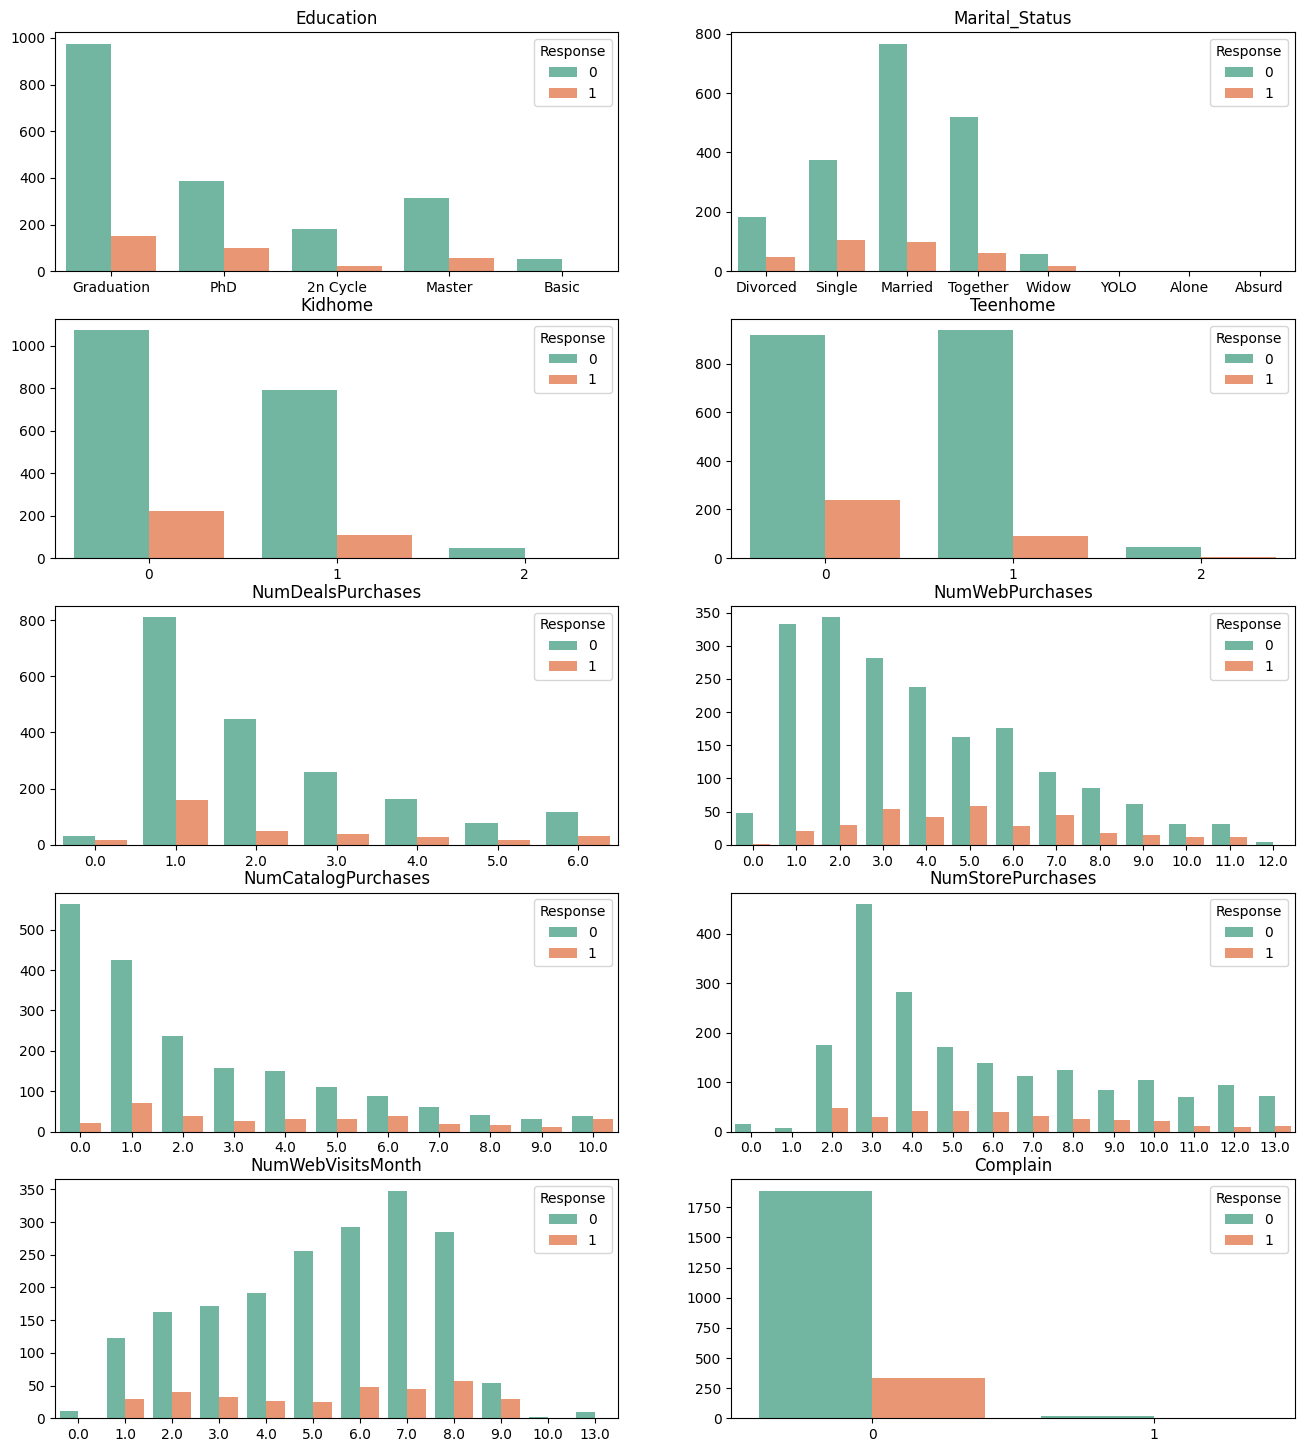

In [15]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']


fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(copied, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()

In [16]:
# Define the columns to dummy encode
columns_to_encode = ['Education', 'Marital_Status']

# Apply pd.get_dummies to the specified columns
copied_encoded = pd.get_dummies(copied, columns=columns_to_encode)

# Convert boolean columns to integers
copied_encoded = copied_encoded.astype(int)

encoded_df = pd.DataFrame(copied_encoded)

encoded_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1970,84835,0,0,0,189,81,379,111,81,...,0,0,0,0,1,0,0,0,0,0
1,1961,57091,0,0,0,464,5,64,7,0,...,0,0,0,0,0,0,1,0,0,0
2,1958,67267,0,1,0,134,11,59,15,2,...,0,0,0,0,0,1,0,0,0,0
3,1967,32474,1,1,0,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1989,21474,1,0,0,6,16,24,11,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
encoded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,51875.146875,20936.077094,1730.0,35538.75,51741.5,68289.75,117416.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,302.112946,331.057356,0.0,23.75,173.5,504.25,1225.0
MntFruits,2240.0,21.679018,27.257348,0.0,1.00,8.0,33.00,81.0
MntMeatProducts,2240.0,150.873214,178.816658,0.0,16.00,67.0,232.00,556.0
MntFishProducts,2240.0,32.066071,40.252565,0.0,3.00,12.0,50.00,120.0
MntSweetProducts,2240.0,21.937946,27.540334,0.0,1.00,8.0,33.00,81.0


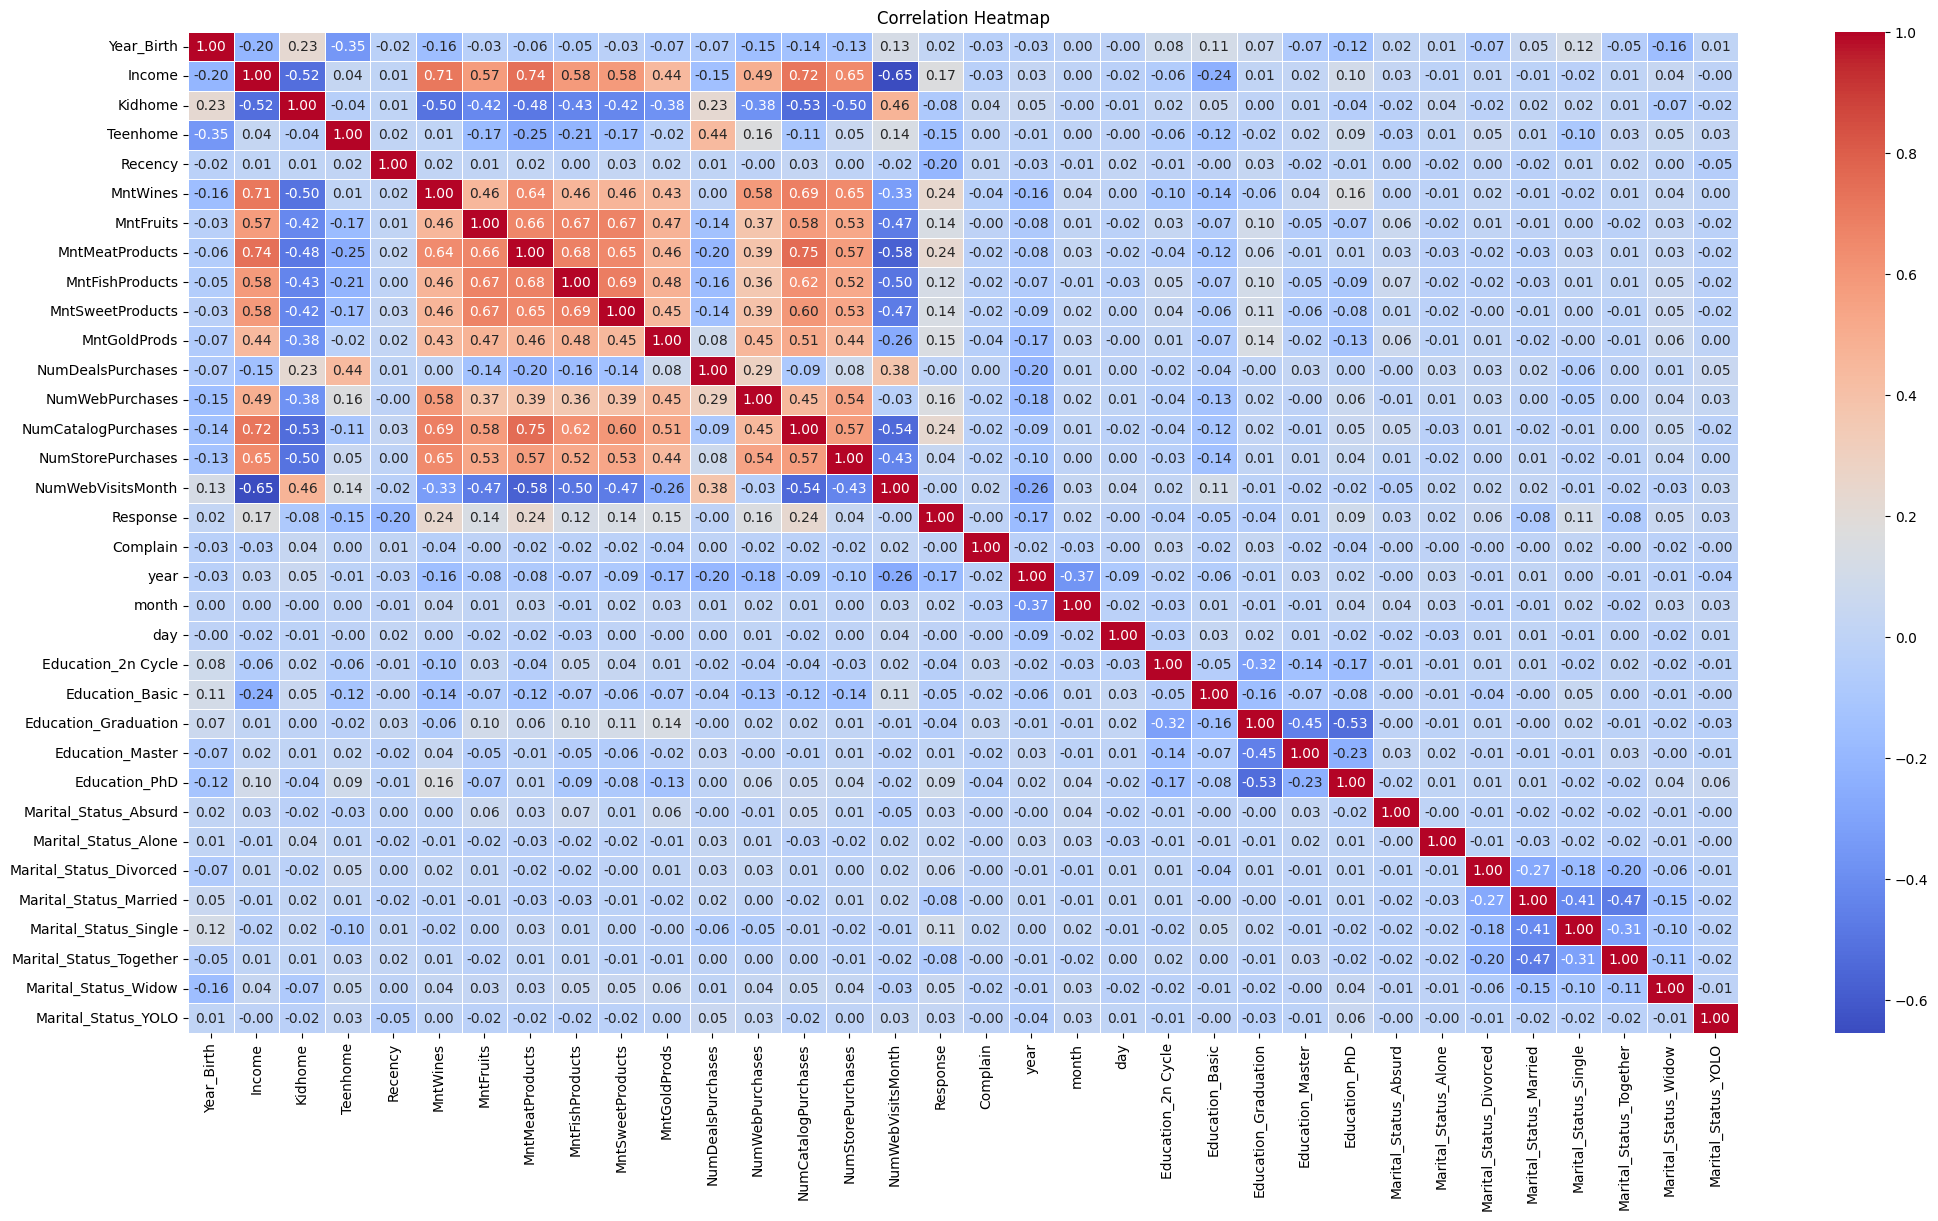

In [18]:
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(25, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

plt.show();

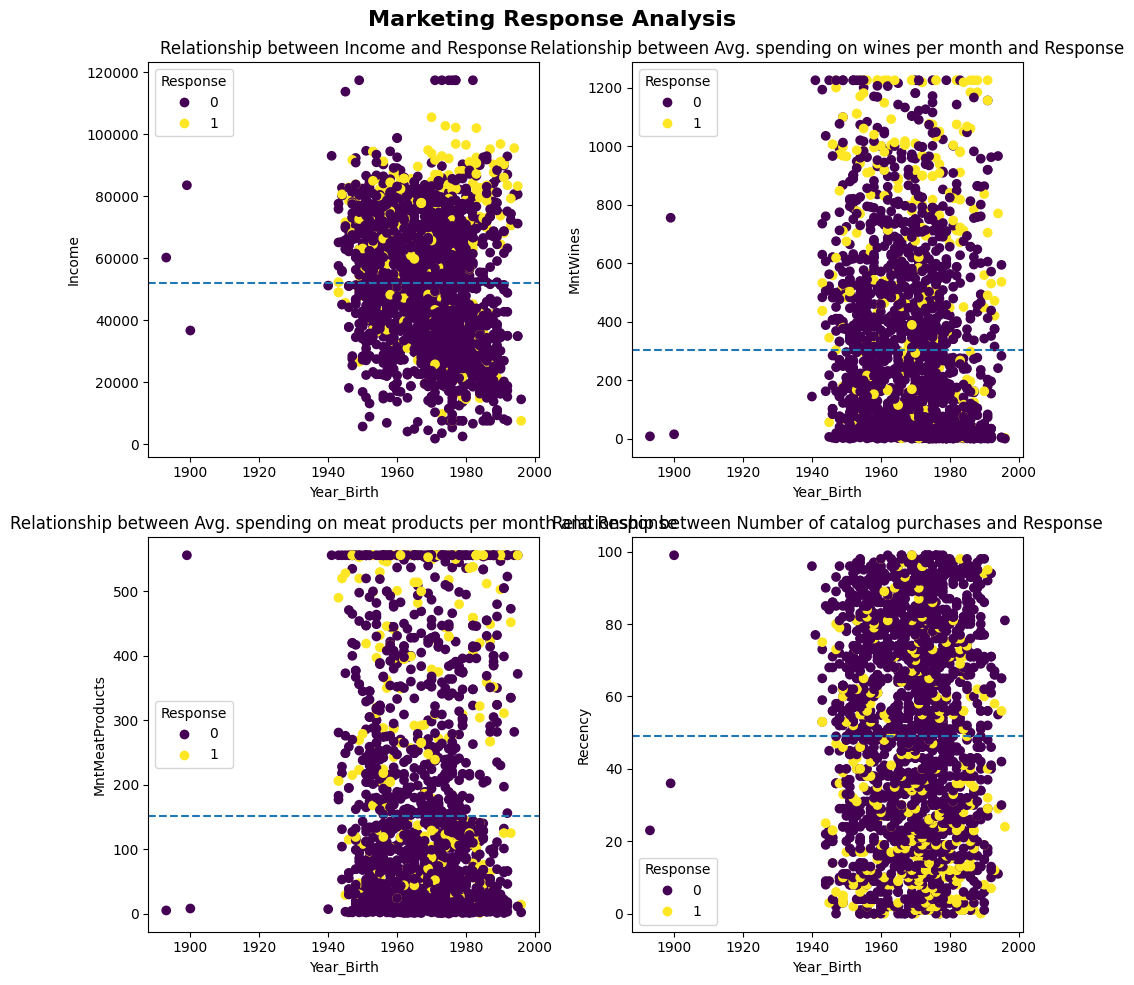

In [19]:
import matplotlib.pyplot as plt

# Create subplots
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Add data and customize each subplot as needed
# Add data to ax0
scatter = ax0.scatter(x=encoded_df['Year_Birth'],
                      y=encoded_df['Income'],
                      c=encoded_df['Response'])
ax0.set(title='Relationship between Income and Response',
        xlabel='Year_Birth',
        ylabel='Income')
ax0.legend(*scatter.legend_elements(), title='Response')
ax0.axhline(y=encoded_df['Income'].mean(), linestyle='--')

# Add data to ax1
scatter1 = ax1.scatter(x=encoded_df['Year_Birth'],
                       y=encoded_df['MntWines'],
                       c=encoded_df['Response'])
ax1.set(title='Relationship between Avg. spending on wines per month and Response',
        xlabel='Year_Birth',
        ylabel='MntWines')
ax1.legend(*scatter1.legend_elements(), title='Response')
ax1.axhline(y=encoded_df['MntWines'].mean(), linestyle='--')

# Add data to ax2
scatter2 = ax2.scatter(x=encoded_df['Year_Birth'],
                       y=encoded_df['MntMeatProducts'],
                       c=encoded_df['Response'])
ax2.set(title='Relationship between Avg. spending on meat products per month and Response',
        xlabel='Year_Birth',
        ylabel='MntMeatProducts')
ax2.legend(*scatter2.legend_elements(), title='Response')
ax2.axhline(y=encoded_df['MntMeatProducts'].mean(), linestyle='--')

# Add data to ax3
scatter3 = ax3.scatter(x=encoded_df['Year_Birth'],
                       y=encoded_df['Recency'],
                       c=encoded_df['Response'])
ax3.set(title='Relationship between Number of catalog purchases and Response',
        xlabel='Year_Birth',
        ylabel='Recency')
ax3.legend(*scatter3.legend_elements(), title='Response')
ax3.axhline(y=encoded_df['Recency'].mean(), linestyle='--')

# Add a title to the figure
fig.suptitle('Marketing Response Analysis', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


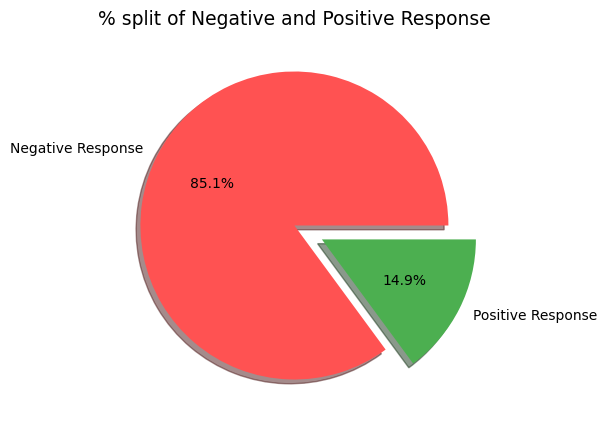

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(
    encoded_df['Response'].value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('% split of Negative and Positive Response', fontsize=13.5)

#Save the image below
plt.savefig("Pie chart (before balancing the distribution).png",dpi = 300,bbox_inches ="tight")

plt.show()

In [21]:
# Define functions
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    return metric_dict

### Defining X and y 

In this section, I divided the dataset into X and y. As per standard, when building a machine learning model, one of the initial steps is to divide the dataset into two main components: the feature matrix (often denoted as X) and the target variable (often denoted as y).

In [22]:
X = encoded_df.drop("Response",axis=1)
y = encoded_df["Response"]

In [23]:
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Standardize X

Standardization, or feature scaling, is crucial before fitting data into machine learning models because it ensures that all features contribute equally to the model training process, preventing features with larger scales from dominating those with smaller scales.

In [24]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Convert the scaled data back to a DataFrame
scaled_df_X_train = pd.DataFrame(scaled_X_train, columns=X.columns)
scaled_df_X_test = pd.DataFrame(scaled_X_test, columns=X.columns)

In [25]:
scaled_df_X_train.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.094464,-0.851809,1.055438,-0.934826,-0.532985,-0.892831,-0.674655,-0.796807,-0.789360,-0.683779,...,-0.450205,-0.526558,-0.033426,-0.04095,-0.34742,-0.781065,1.943879,-0.598836,-0.194004,-0.033426
1,-1.486036,0.371534,-0.820896,-0.934826,0.229992,-0.633612,1.660766,0.090231,-0.056213,0.767650,...,2.221210,-0.526558,-0.033426,-0.04095,-0.34742,1.280303,-0.514435,-0.598836,-0.194004,-0.033426
2,1.259043,-0.737110,1.055438,-0.934826,0.646162,-0.479889,-0.492200,-0.111879,-0.716046,-0.393494,...,-0.450205,-0.526558,-0.033426,-0.04095,-0.34742,-0.781065,1.943879,-0.598836,-0.194004,-0.033426
3,1.009490,1.250209,-0.820896,-0.934826,-0.706389,-0.699924,2.171639,1.387103,2.143227,0.005649,...,2.221210,-0.526558,-0.033426,-0.04095,-0.34742,-0.781065,-0.514435,1.669905,-0.194004,-0.033426
4,0.260833,0.383617,1.055438,0.884075,1.305097,0.972946,1.149893,0.163215,-0.227281,-0.175779,...,-0.450205,-0.526558,-0.033426,-0.04095,-0.34742,1.280303,-0.514435,-0.598836,-0.194004,-0.033426


### Building Our Model

Here we are going to use four Models to train our dataset

- LogisticRegression
- RandomForestClassifier
- XGBoost

#### LogisticRegression

Logistic regression is a statistical method used for binary classification, estimating the probability that an instance belongs to a particular class based on its features, by fitting a logistic function to the data.

In [26]:
np.random.seed(42)
 
#Define model
Lr_model = LogisticRegression()
 
#Fit model
Lr_model.fit(scaled_df_X_train, y_train)

LogisticRegression()

##### Evaluate Logistic Regression

In [27]:
y_pred = Lr_model.predict(scaled_df_X_test)

LR_Nor = evaluate_preds(y_test,y_pred)

Accuracy:84.82%
Precision:0.54
Recall:0.36
F1 Score: 0.43


##### Visualize Using Confusion Matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[354,  22],
       [ 46,  26]], dtype=int64)

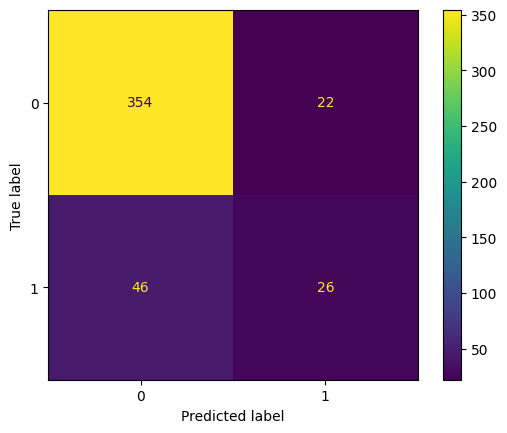

In [29]:
ConfusionMatrixDisplay.from_estimator(estimator = Lr_model, X = scaled_df_X_test, y = y_test);

#### RandomForestClassifier

RandomForestClassifier is an ensemble learning method that fits multiple decision tree classifiers on various sub-samples of the dataset and aggregates their predictions to improve accuracy and robustness.

In [30]:
np.random.seed(42)
 
#Define model
Rf_model = RandomForestClassifier()
 
#Fit model
Rf_model.fit(scaled_df_X_train, y_train)

RandomForestClassifier()

##### Evaluate Random Forest Classifier

In [31]:
y_pred2 = Rf_model.predict(scaled_df_X_test)

Rf_Nor = evaluate_preds(y_test,y_pred2)

Accuracy:85.49%
Precision:0.67
Recall:0.19
F1 Score: 0.30


##### Visualize Using Confusion Matrix

In [32]:
confusion_matrix(y_test, y_pred2)

array([[369,   7],
       [ 58,  14]], dtype=int64)

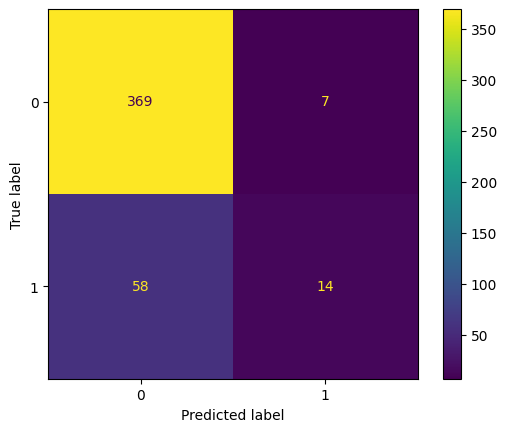

In [33]:
ConfusionMatrixDisplay.from_estimator(estimator = Rf_model, X = scaled_df_X_test, y = y_test);

#### XGBClassifier

XGBClassifier is a gradient boosting algorithm implementation based on the XGBoost library, designed for classification tasks, known for its efficiency, scalability, and high performance in handling structured/tabular data.

In [34]:
np.random.seed(42)
 
#Define model
Xgb_model = XGBClassifier()
 
#Fit model
Xgb_model.fit(scaled_df_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Evaluate XGBClassifier

In [35]:
y_pred3 = Xgb_model.predict(scaled_df_X_test)

Xgb_Nor = evaluate_preds(y_test,y_pred3)

Accuracy:84.15%
Precision:0.51
Recall:0.31
F1 Score: 0.38


##### Visualize Using Confusion Matrix

In [36]:
confusion_matrix(y_test, y_pred3)

array([[355,  21],
       [ 50,  22]], dtype=int64)

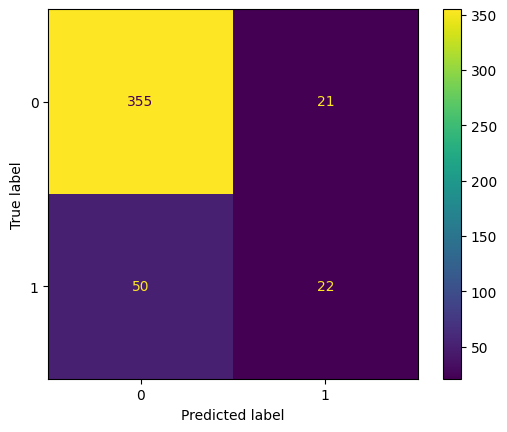

In [37]:
ConfusionMatrixDisplay.from_estimator(estimator = Xgb_model, X = scaled_df_X_test, y = y_test);

### Hyperparameter tuning

Hyperparameter tuning in machine learning involves adjusting the settings that govern a model's learning process to enhance its performance. Despite achieving high accuracy scores for Logistic Regression, Random Forest Classifier, XGBClassifier, and LGBMClassifier models, their confusion matrices reveal a common issue: a tendency to incorrectly classify loan applicants as non-applicants due to being too eager to label people as such. To address this, hyperparameter tuning will be introduced using Randomized Search and Grid Search (Depending on which gives the best results). Random Search explores hyperparameter combinations randomly, striking a balance between exploration and exploitation, while Grid Search systematically evaluates predefined combinations. By tuning hyperparameters, such as regularization strength or the number of neighbors, the aim is to refine the models' behavior and reduce misclassifications, ultimately improving their effectiveness in identifying loan applicants accurately.

#### Tuned Logistic Regression

In [38]:
grid ={
     'penalty': ['l1', 'l2', 'elasticnet'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
 }

np.random.seed(42)

# Define model
LR_model_2 = LogisticRegression(n_jobs = -1)

# Setup RandomizedSearchCV
gs_LR_model_2 = GridSearchCV(estimator = LR_model_2,
                           param_grid = grid,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
gs_LR_model_2.fit(scaled_df_X_train, y_train);

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, sol

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   2.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=1

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

In [39]:
# To see the best parameter combination
gs_LR_model_2.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

##### Evaluate tuned model

In [40]:
# To predict with the best hyperparameter
y_pred4 = gs_LR_model_2.predict(scaled_df_X_test)

LR_gs = evaluate_preds(y_test, y_pred4)

Accuracy:85.04%
Precision:0.55
Recall:0.38
F1 Score: 0.45


##### Visualize tuned model using confusion matrix

In [41]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred4)

array([[354,  22],
       [ 45,  27]], dtype=int64)

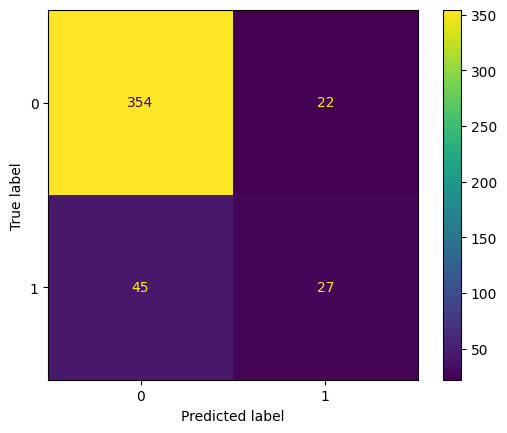

In [42]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_LR_model_2, X = scaled_df_X_test, y = y_test);

#### Tuned Randon Forest Classifier

##### Tuned with RandomizedSearch

Tuning using RandomizedSearch involves randomly sampling from a defined search space of hyperparameters to efficiently explore a wide range of values and find optimal parameters for a machine learning model.

In [43]:
grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
 
np.random.seed(42)
 
# Instantiate RandomForestClassifier
Rf_model_2 = RandomForestClassifier(n_jobs=1)
 
# Setup RandomizedSearchCV
rs_Rf_model_2 = RandomizedSearchCV(estimator=Rf_model_2,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)
 
# Fit the RandomizedSearchCV version 
rs_Rf_model_2.fit(scaled_df_X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

In [44]:
# To see the best parameter combination
rs_Rf_model_2.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

##### Evaluate tuned model

In [45]:
# To predict with the best hyperparameter
y_pred5 = rs_Rf_model_2.predict(scaled_df_X_test)

Rf_rs = evaluate_preds(y_test, y_pred5)

Accuracy:85.49%
Precision:0.67
Recall:0.19
F1 Score: 0.30


##### Visualize tuned model using confusion matrix

In [46]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred5)

array([[369,   7],
       [ 58,  14]], dtype=int64)

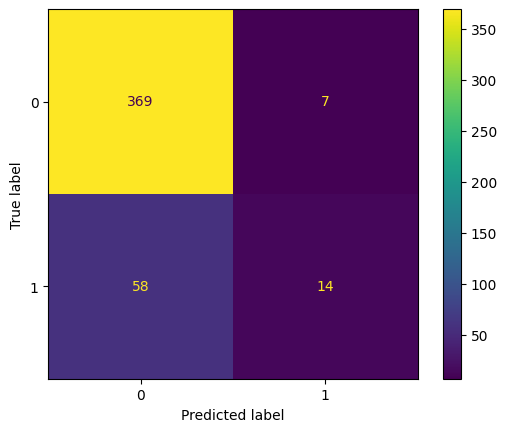

In [47]:
ConfusionMatrixDisplay.from_estimator(estimator = rs_Rf_model_2, X = scaled_df_X_test, y = y_test);

##### Tuned with GridSearch

Tuning using GridSearch involves exhaustively searching through a specified parameter grid to find the optimal combination of hyperparameters for a machine learning model.

In [48]:
param_grid = {
    'n_estimators': [50,100,300],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True, False]}
 
np.random.seed(42)
 
# Define model
Rf_model_3 = RandomForestClassifier(n_jobs = -1)
 
# Setup GridSearchCV
gs_Rf_model_3 = GridSearchCV(estimator = Rf_model_3,
                           param_grid = param_grid,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit GridSearch model
gs_Rf_model_3.fit(scaled_df_X_train, y_train);

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total ti

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

In [49]:
# To see the best parameter combination
gs_Rf_model_3.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

##### Evaluate tuned model

In [50]:
# To predict with the best hyperparameter
y_pred6 = gs_Rf_model_3.predict(scaled_df_X_test)

Rf_gs = evaluate_preds(y_test, y_pred6)

Accuracy:85.49%
Precision:0.67
Recall:0.19
F1 Score: 0.30


##### Visualize tuned model using confusion matrix

In [51]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred6)

array([[369,   7],
       [ 58,  14]], dtype=int64)

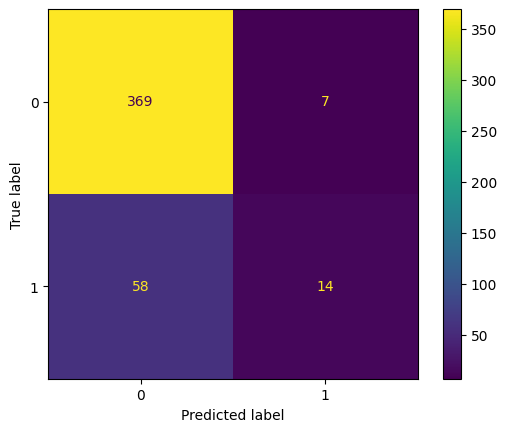

In [52]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Rf_model_3, X = scaled_df_X_test, y = y_test);

#### Tuned XGBClassifier 

In [53]:
# Define XGBClassifier estimator
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define parameters grid
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create GridSearchCV object
gs_Xgb_model_2 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs=10,
    cv=10,
    verbose=True
)

# Fit the model
gs_Xgb_model_2.fit(scaled_df_X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             verbose=True)

In [54]:
# To see the best parameter combination
gs_Xgb_model_2.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 140}

##### Evaluate tuned model

In [55]:
# To predict with the best hyperparameter
y_pred7 = gs_Xgb_model_2.predict(scaled_df_X_test)

Xgb_gs = evaluate_preds(y_test, y_pred7)

Accuracy:83.71%
Precision:0.49
Recall:0.28
F1 Score: 0.35


##### Visualize tuned model using confusion matrix

In [56]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test, y_pred7)

array([[355,  21],
       [ 52,  20]], dtype=int64)

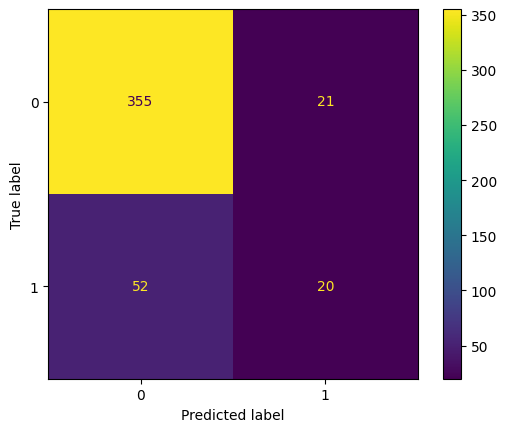

In [57]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Xgb_model_2, X = scaled_df_X_test, y = y_test);

## Oversampling

In [58]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X,y)
 
X_resampled.shape, y_resampled.shape

((3812, 33), (3812,))

In [59]:
np.random.seed(42)

# Split the data into train and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2)

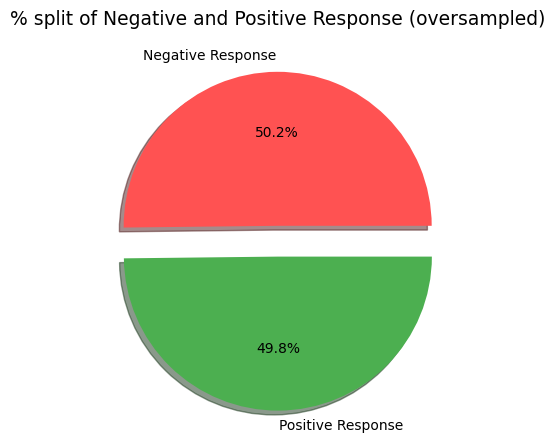

In [60]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(
    y_train_resampled.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('% split of Negative and Positive Response (oversampled)', fontsize=13.5)

#Save the image below
plt.savefig("Pie chart - Oversample (Target).png",dpi = 300,bbox_inches ="tight")

plt.show()

In [61]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_X_train_res = scaler.fit_transform(X_train_resampled)
scaled_X_test_res = scaler.fit_transform(X_test_resampled)

# Convert the scaled data back to a DataFrame
scaled_df_X_train_res = pd.DataFrame(scaled_X_train_res, columns=X.columns)
scaled_df_X_test_res = pd.DataFrame(scaled_X_test_res, columns=X.columns)

### Logistic Regression

In [62]:
np.random.seed(42)
 
#Define model
Lr_model_res = LogisticRegression()
 
#Fit model
Lr_model_res.fit(scaled_df_X_train_res, y_train_resampled)

LogisticRegression()

##### Evaluate tuned model

In [63]:
# To predict with the best hyperparameter
y_pred8 = Lr_model_res.predict(scaled_df_X_test_res)

Lr_Nor_res = evaluate_preds(y_test_resampled, y_pred8)

Accuracy:77.06%
Precision:0.78
Recall:0.77
F1 Score: 0.77


##### Visualize tuned model using confusion matrix

In [64]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_resampled, y_pred8)

array([[291,  85],
       [ 90, 297]], dtype=int64)

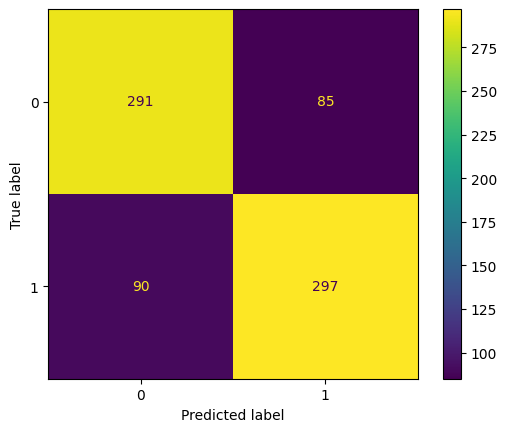

In [65]:
ConfusionMatrixDisplay.from_estimator(estimator = Lr_model_res, X = scaled_df_X_test_res, y = y_test_resampled);

### Random Forest Classifier

In [66]:
np.random.seed(42)
 
#Define model
Rf_model_res = RandomForestClassifier()
 
#Fit model
Rf_model_res.fit(scaled_df_X_train_res, y_train_resampled)

RandomForestClassifier()

##### Evaluate tuned model

In [67]:
# To predict with the best hyperparameter
y_pred9 = Rf_model_res.predict(scaled_df_X_test_res)

Rf_Nor_res = evaluate_preds(y_test_resampled, y_pred9)

Accuracy:96.99%
Precision:0.97
Recall:0.97
F1 Score: 0.97


##### Visualize tuned model using confusion matrix

In [68]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_resampled, y_pred9)

array([[363,  13],
       [ 10, 377]], dtype=int64)

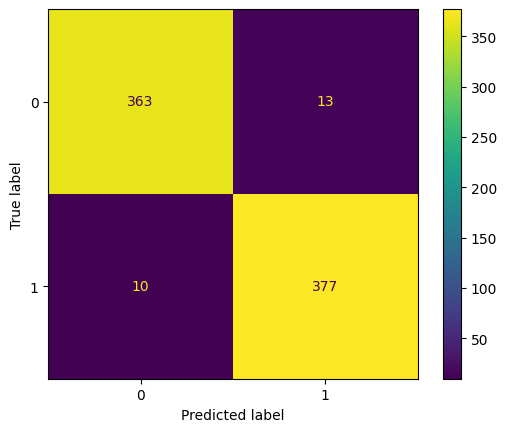

In [69]:
ConfusionMatrixDisplay.from_estimator(estimator = Rf_model_res, X = scaled_df_X_test_res, y = y_test_resampled);

### XGB Classifier

In [70]:
np.random.seed(42)
 
#Define model
Xgb_model_res = XGBClassifier()
 
#Fit model
Xgb_model_res.fit(scaled_df_X_train_res, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Evaluate tuned model

In [71]:
# To predict with the best hyperparameter
y_pred10 = Xgb_model_res.predict(scaled_df_X_test_res)

Xgb_Nor_res = evaluate_preds(y_test_resampled, y_pred10)

Accuracy:87.16%
Precision:0.88
Recall:0.87
F1 Score: 0.87


##### Visualize tuned model using confusion matrix

In [72]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_resampled, y_pred10)

array([[330,  46],
       [ 52, 335]], dtype=int64)

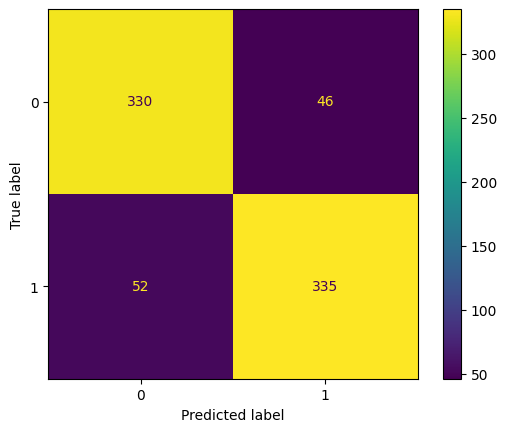

In [73]:
ConfusionMatrixDisplay.from_estimator(estimator = Xgb_model_res, X = scaled_df_X_test_res, y = y_test_resampled);

### Hyperparameter tuning (Oversampling)

#### Tuned Logistic Regression

In [74]:
grid ={
     'penalty': ['l1', 'l2', 'elasticnet'],
     'C': [0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs', 'newton-cg', 'liblinear']
 }

np.random.seed(42)

# Define model
LR_model_2_res = LogisticRegression(n_jobs = -1)

# Setup RandomizedSearchCV
gs_LR_model_2_res = GridSearchCV(estimator = LR_model_2,
                           param_grid = grid,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit Randomized model
gs_LR_model_2_res.fit(scaled_df_X_train_res, y_train_resampled);

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, sol

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .......C=0.01, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..................C

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python3

[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, pena

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
125 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback

In [75]:
# To see the best parameter combination
gs_LR_model_2_res.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

##### Evaluate tuned model

In [76]:
# To predict with the best hyperparameter
y_pred11 = gs_LR_model_2_res.predict(scaled_df_X_test_res)

Lr_Gs_res = evaluate_preds(y_test_resampled, y_pred11)

Accuracy:76.93%
Precision:0.78
Recall:0.77
F1 Score: 0.77


##### Visualize tuned model using confusion matrix

In [77]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_resampled, y_pred11)

array([[290,  86],
       [ 90, 297]], dtype=int64)

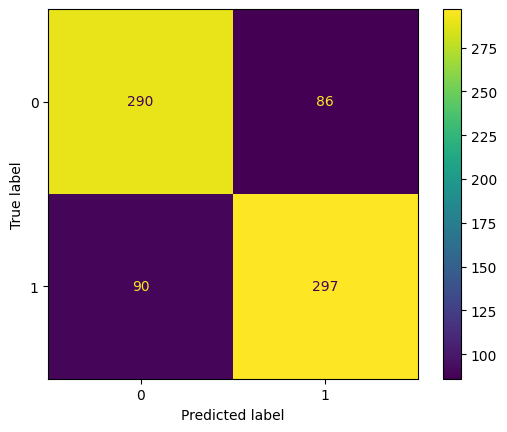

In [78]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_LR_model_2_res, X = scaled_df_X_test_res, y = y_test_resampled);

#### Tuned Randon Forest Classifier

In [79]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True, False]}
 
np.random.seed(42)
 
# Define model
Rf_model_3_res = RandomForestClassifier(n_jobs = -1)
 
# Setup GridSearchCV
gs_Rf_model_3_res = GridSearchCV(estimator = Rf_model_3_res,
                           param_grid = param_grid,
                           #n_iter = 10, #The number of models t try
                           cv = 5,
                           verbose = 2)
#Fit GridSearch model
gs_Rf_model_3_res.fit(scaled_df_X_train_res, y_train_resampled);

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; tot

C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\omoto\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

In [80]:
# To see the best parameter combination
gs_Rf_model_3_res.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 300}

##### Evaluate tuned model

In [81]:
# To predict with the best hyperparameter
y_pred12 = gs_Rf_model_3_res.predict(scaled_df_X_test_res)

Rf_Gs_res = evaluate_preds(y_test_resampled, y_pred12)

Accuracy:97.25%
Precision:0.97
Recall:0.97
F1 Score: 0.97


##### Visualize tuned model using confusion matrix

In [82]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_resampled, y_pred13)

NameError: name 'y_pred13' is not defined

In [ ]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Rf_model_3_res, X = scaled_df_X_test_res, y = y_test_resampled);

#### Tuned XGBClassifier 

In [ ]:
# Define XGBClassifier estimator
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define parameters grid
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create GridSearchCV object
gs_Xgb_model_2_res = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    n_jobs=10,
    cv=10,
    verbose=True
)

# Fit the model
gs_Xgb_model_2_res.fit(scaled_df_X_train_res, y_train_resampled);

In [ ]:
# To see the best parameter combination
gs_Xgb_model_2_res.best_params_

##### Evaluate tuned model

In [ ]:
# To predict with the best hyperparameter
y_pred13 = gs_Xgb_model_2_res.predict(scaled_df_X_test_res)

Xgb_gs_res = evaluate_preds(y_test_resampled, y_pred13)

##### Visualize tuned model using confusion matrix

In [ ]:
# To see the confusion matrix of the predictions vs the actual
confusion_matrix(y_test_resampled, y_pred13)

In [ ]:
ConfusionMatrixDisplay.from_estimator(estimator = gs_Xgb_model_2_res, X = scaled_df_X_test_res, y = y_test_resampled);

### Compare the outcomes of our models

In [ ]:
compare_matrics = pd.DataFrame({'baseline_LR': LR_Nor,
                                'baseline_RF': Rf_Nor,
                                'baseline_XGB': Xgb_Nor,
                                'GridTuned_LR': LR_gs,
                                'RStuned_RF': Rf_rs,
                                'GStuned_RF': Rf_gs,
                                'Gridtuned_XGB': Xgb_gs,
                                'Resam_LR': Lr_Nor_res,
                                'Resam_RF': Rf_Nor_res,
                                'Resam_XGB': Xgb_Nor_res,
                                'GridTuned_LR_res': Lr_Gs_res,
                                'GStuned_RF_res': Rf_Gs_res,
                                'Gridtuned_XGB_res': Xgb_gs_res})
compare_matrics

### Conclusion

The model "GStuned_RF_res" shows the highest performance across all key metrics (accuracy, precision, recall, and F1 score), achieving a consistent score of 0.97 in each category. This indicates a highly reliable and balanced model, capable of maintaining high precision without compromising recall, leading to an optimal F1 score. Thus, "GStuned_RF_res" is the recommended model due to its superior and consistent performance across all evaluation metrics including the confusion matrix.

### Save model

In [ ]:
#save the best-performing model
pickle.dump(gs_Rf_model_3_res, open('superstore_best_model.pkl', 'wb'))